In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('./results.csv',index_col=False,names=['draw','date','num1','num2','num3','num4','num5','num6'])

In [21]:
#Checking df size
df.shape

(2514, 8)

In [22]:
# Droping duplicated rows
df.drop_duplicates(subset=['draw','num1','num2','num3','num4','num5','num6'],keep='first',inplace=True)

In [23]:
#Checking rows with duplicated draw number
df[df['draw'].duplicated(keep=False)]

,draw,date,num1,num2,num3,num4,num5,num6
521,1686,(14/03/2015),9,14,37,44,46,55
540,1667,(07/01/2015),7,12,24,44,51,56
541,1666,(03/01/2015),1,2,23,27,45,51
647,1560,(31/12/2013),20,30,36,38,47,53
827,1686,(14/03/2015),9,14,37,44,46,55
847,1667,07/01/2015,07,12,24,44,51,56
848,1666,03/01/2015,01,02,23,27,45,51
954,1560,(31/12/2013),20,30,36,38,47,53


In [24]:
#Droping rows with duplicated draw number
df.drop_duplicates(subset=['draw'],keep='first',inplace=True)

In [25]:
#Checking df size after removing duplicates
df.shape

(2108, 8)

In [26]:
# Checking data types
df.dtypes

draw    object
date    object
num1    object
num2    object
num3    object
num4    object
num5    object
num6    object
dtype: object

In [27]:
#Convert columns dtypes to int
for col in df.columns:
    if col not in ('date','draw'): 
        df[col].replace("[^0-9]","", regex=True,inplace=True) 
        df[col] = df[col].apply(pd.to_numeric)

In [28]:
# Checking data types
df.dtypes

draw    object
date    object
num1     int64
num2     int64
num3     int64
num4     int64
num5     int64
num6     int64
dtype: object

In [29]:
# Checking first rows
df.head()

,draw,date,num1,num2,num3,num4,num5,num6
0,2107,(15/12/2018),8,38,44,50,56,60
1,2106,(12/12/2018),3,27,36,39,40,43
2,2105,(08/12/2018),11,13,16,24,31,46
3,2104,(06/12/2018),2,10,12,27,45,56
4,2103,(04/12/2018),3,13,40,44,46,50


In [30]:
#cheking max, min for each int col
df.describe()

,num1,num2,num3,num4,num5,num6
count,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000
mean,8.588235,17.213947,26.180740,34.961101,43.543169,52.268027
std,7.048432,9.155528,10.014847,9.884449,9.091088,6.876618
min,1.000000,2.000000,3.000000,8.000000,11.000000,22.000000
25%,3.000000,10.000000,19.000000,28.000000,38.000000,49.000000
50%,7.000000,16.000000,26.000000,35.000000,45.000000,54.000000
75%,12.000000,23.000000,33.000000,42.000000,51.000000,58.000000
max,50.000000,51.000000,56.000000,58.000000,59.000000,60.000000


## Number frequency

In [31]:
# save all numbers in a list
all_numbers = [] 
for col in df.select_dtypes(include='int64'):
    all_numbers.extend(df[col])
#check size
len(all_numbers)/6

2108.0

In [32]:
#save list in pandas df
numbers_df = pd.DataFrame(all_numbers,columns=['numbers'])

In [33]:
#check max,min values
numbers_df.describe()

,numbers
count,12648.000000
mean,30.459203
std,17.323039
min,1.000000
25%,15.000000
50%,31.000000
75%,45.000000
max,60.000000


In [34]:
# Number frequency
df_count = pd.concat([numbers_df['numbers'].value_counts(), 
                numbers_df['numbers'].value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
display("Most frequent numbers:",df_count.head())
print("\n")
display("Less frequent numbers:",df_count.tail())

'Most frequent numbers:'

,counts,percentage
10,243,1.921252
5,240,1.897533
53,238,1.881720
4,233,1.842188
23,233,1.842188


'Less frequent numbers:'

,counts,percentage
9,188,1.486401
22,188,1.486401
55,181,1.431056
21,180,1.423150
26,171,1.351992


### Ploting most and less frequent numbers:

In [35]:
def list_to_string(list1):
    return list(map(str, list1))

In [36]:
## Grabing numbers:
most_comon_index = df_count.head().index
most_comon_counts = df_count.head()['percentage'].values
less_comon_index = df_count.tail().index
less_comon_counts = df_count.tail()['percentage'].values

#reversing lists
most_comon_index = most_comon_index[::-1]
most_comon_counts = most_comon_counts[::-1]
less_comon_index = less_comon_index[::-1]
less_comon_counts = less_comon_counts[::-1]

In [37]:
## concatenating x lables
x_list = np.concatenate((less_comon_counts, most_comon_counts), axis=0)
x_list = np.round(x_list, 2)

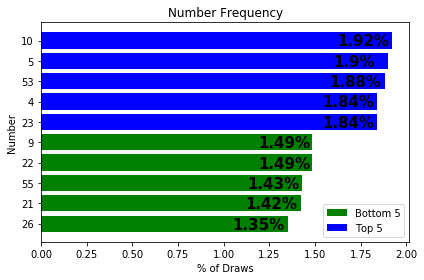

In [47]:
barlist = plt.barh(list_to_string(less_comon_index),less_comon_counts,color='g',label='Bottom 5')
barlist2 = plt.barh(list_to_string(most_comon_index),most_comon_counts,color='b',label='Top 5')


plt.xlabel('% of Draws')
plt.ylabel('Number')
plt.title('Number Frequency')
plt.legend()
plt.tight_layout()
ax = plt.gca()
for i, v in enumerate(x_list):
      ax.text(v-.3, i - .25, str(v)+'%', color='k', fontweight='bold',fontsize=15)
plt.show()

## Winning numbers histogram

In [39]:
def single_histogram(list,y_lable,x_lable,bins_= None):
    mu = str(round(np.mean(list),2))
    sigma = str(round(np.std(list)))
    mean= str(round(np.mean(list)))
    x = list
    # the histogram of the data
    n, bins, patches = plt.hist(x, facecolor='b', alpha=0.75,bins=bins_)
    print('mean=' + mean)
    plt.xlabel(x_lable)
    plt.ylabel(y_lable)
    plt.title('Histogram of Mega-Sena ' + x_lable)
    plt.text(max(list)/2,max(list)/1.1, r'$\mu='+ mu +',\ \sigma=' + sigma + '$'
             ,horizontalalignment='center',verticalalignment='center'
             ,fontsize=20)
#   plt.axis([40, 160, 0, 0.03])
    plt.grid(True)
    plt.show()

mean=30


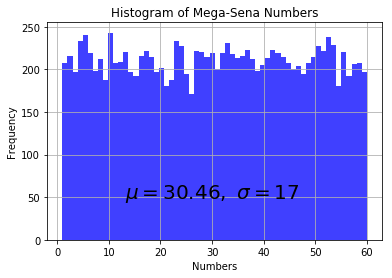

In [40]:
single_histogram(numbers_df['numbers'],'Frequency','Numbers',bins_=60)

## Even and Odd Bar Chart:

In [41]:
# Creating dummy
numbers_df['is_even'] = np.where((numbers_df['numbers'] % 2 ==0),1,0)

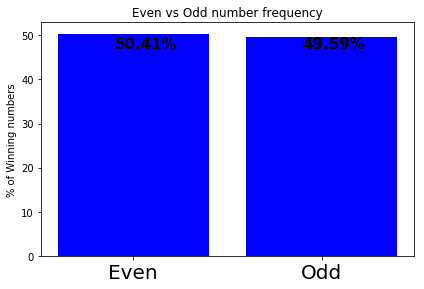

In [46]:
#Creating axis
even = numbers_df['is_even'].value_counts()[1]
odd = numbers_df['is_even'].value_counts()[0]
even_pct = round(numbers_df['is_even'].value_counts(normalize=True)[1]*100,2)
odd_pct = round(numbers_df['is_even'].value_counts(normalize=True)[0]*100,2)


#Creating plot
barlist = plt.bar(['Even','Odd'],[even_pct,odd_pct],color='b')
plt.ylabel('% of Winning numbers')
plt.title('Even vs Odd number frequency')
plt.tight_layout()
plt.xticks(fontsize=20)
ax = plt.gca()
mu = str(round(np.mean(numbers_df['is_even']),4))
for i, v in enumerate([even_pct,odd_pct]):
    ax.text(-0.1+i, 47 , str(v)+'%', color='k', fontweight='bold',fontsize=15)
plt.show()


## Dozens Bar Chart:

In [131]:
#Creating dummies
numbers_df['1to10'] = np.where((numbers_df['numbers'] > 0) & (numbers_df['numbers'] < 11),1,0)
numbers_df['11to20'] = np.where((numbers_df['numbers'] > 10) & (numbers_df['numbers'] < 21),1,0)
numbers_df['21to30'] = np.where((numbers_df['numbers'] > 20) & (numbers_df['numbers'] < 31),1,0)
numbers_df['31to40'] = np.where((numbers_df['numbers'] > 30) & (numbers_df['numbers'] < 41),1,0)
numbers_df['41to50'] = np.where((numbers_df['numbers'] > 40) & (numbers_df['numbers'] < 51),1,0)
numbers_df['51to60'] = np.where((numbers_df['numbers'] > 50),1,0)

In [184]:
#Calculating proportion for each dozen
dic_mean_dozens = {}
for col in numbers_df:
    if 'to' in col:
        dic_mean_dozens.update({col : round(np.mean(numbers_df[col])*100,2)})
dic_mean_dozens

{'1to10': 17.02,
 '11to20': 16.42,
 '21to30': 16.34,
 '31to40': 16.88,
 '41to50': 16.59,
 '51to60': 16.75}

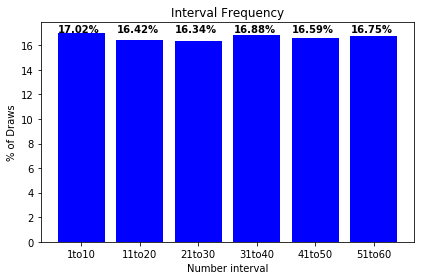

In [199]:
#Ploting results
barlist = plt.bar(dic_mean_dozens.keys(),dic_mean_dozens.values(),color='b')
plt.ylabel('% of Draws')
plt.title('Interval Frequency')
plt.xlabel('Number interval')
plt.tight_layout()
ax = plt.gca()
for i, v in enumerate(dic_mean_dozens.values()):
    ax.text(i-0.4, 17.1 , str(v)+'%', color='k', fontweight='bold')
plt.show()


### Most frequent Combinations

In [25]:
import itertools

In [26]:
#Creating dictonary for each draw
dic_draw_numb = {}
for index, row in df.iterrows():
    actual_draw = []
    for j, column in row.iteritems():
        if j not in ['draw','date']:
            actual_draw.append(column)
    dic_draw_numb.update({int(row['draw']) : actual_draw})

In [28]:
# function to gererate n combinations given a lottery draw and add to a new df
def add_comb_df(df,key,value,numb_comb):
    combinations = itertools.combinations(value, numb_comb)
    for comb in combinations:
        if df.empty:
            df.loc[1] = [key,comb]
        else:
            df.loc[max(df.index)+1] =  [key,comb]
    return df

In [130]:
# Creating most frequent 4 number combinations
combinations_4numbs_df = pd.DataFrame(columns=["draw_number","winning_numbers"])
for key,value in dic_draw_numb.items():
    combinations_4numbs_df = add_comb_df(combinations_4numbs_df,key,value,4)

# Printing most frequent 4 number combinations
combinations_4numbs_df['winning_numbers'].value_counts().head(5)

In [31]:
# Creating most frequent 3 number combinations
combinations_3numbs_df = pd.DataFrame(columns=["draw_number","winning_numbers"])
for key,value in dic_draw_numb.items():
    combinations_3numbs_df = add_comb_df(combinations_3numbs_df,key,value,3)

# Printing most frequent 3 number combinations
combinations_3numbs_df['winning_numbers'].value_counts().head(10)

In [89]:
#checking most frequent combination, draw dates
for index in df.index:
    numbers = []
    numbers = set([x for x in df.loc[index] if type(x) is not str])
    test_set = {29,38,50}
    if len(numbers-test_set)==3:
        print(df.loc[index,'draw'],df.loc[index,'date'],numbers)


1803 (26/03/2016) {4, 38, 8, 49, 50, 29}
1708 (27/05/2015) {32, 38, 45, 17, 50, 29}
1628 (20/08/2014) {34, 38, 50, 26, 60, 29}
1425 (15/09/2012) {36, 38, 7, 16, 50, 29}
1315 (31/08/2011) {1, 38, 50, 52, 27, 29}
622 (08/12/2004) {38, 59, 50, 19, 27, 29}
368 (08/06/2002) {32, 38, 44, 13, 50, 29}
30 (29/09/1996) {38, 7, 14, 15, 50, 29}
